In [19]:
import torch
from torch import nn
from d2l import torch as d2l

In [20]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """显示矩阵热图"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

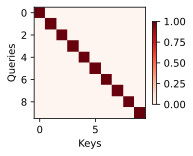

In [21]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

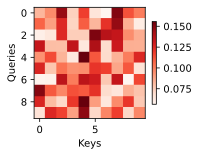

In [22]:
from torch.nn.functional import softmax as F
X = torch.rand((10,10))
X = F(X, dim=1)
X = X.reshape((1,1,10,10))
show_heatmaps(X, xlabel='Keys', ylabel='Queries')

In [23]:
n_train = 50  # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 排序后的训练样本

def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本数
x_train_num = len(x_train)
x_train.shape

torch.Size([50])

In [24]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5);

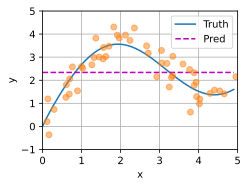

In [25]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.2000,  ..., 0.2000, 0.2000, 0.2000],
        ...,
        [4.7000, 4.7000, 4.7000,  ..., 4.7000, 4.7000, 4.7000],
        [4.8000, 4.8000, 4.8000,  ..., 4.8000, 4.8000, 4.8000],
        [4.9000, 4.9000, 4.9000,  ..., 4.9000, 4.9000, 4.9000]])
X_repeat 的大小形状： torch.Size([50, 50])
x_train 的大小形状： torch.Size([50])
attention_weights 的大小形状： torch.Size([50, 50])
tensor([[7.4418e-02, 7.4209e-02, 7.3910e-02,  ..., 2.4648e-06, 1.4610e-06,
         3.4958e-07],
        [6.9245e-02, 6.9204e-02, 6.9110e-02,  ..., 3.5711e-06, 2.1410e-06,
         5.2777e-07],
        [6.4202e-02, 6.4307e-02, 6.4392e-02,  ..., 5.1557e-06, 3.1263e-06,
         7.9394e-07],
        ...,
        [1.9048e-06, 2.1094e-06, 2.3829e-06,  ..., 6.9055e-02, 6.9842e-02,
         6.7672e-02],
        [1.2968e-06, 1.4392e-06, 1.6302e-06,  ..., 7.3202e-02, 7.4882e-02,
         7.

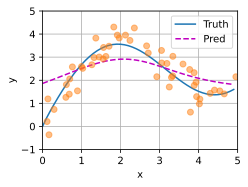

In [36]:
# X_repeat的形状:(n_test,n_train),
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
print(X_repeat)
print("X_repeat 的大小形状：", X_repeat.size())
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每一行都包含着要在给定的每个查询的值（y_train）之间分配的注意力权重
print("x_train 的大小形状：", x_train.size())
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)

print("attention_weights 的大小形状：", attention_weights.size())
print(attention_weights)
#(y_train)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
#print(y_hat)
plot_kernel_reg(y_hat)
print("y_hat 的大小形状：", y_hat.size())

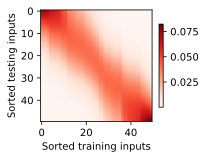

In [37]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')